# Menghitung deteksi sawit dengan template matching

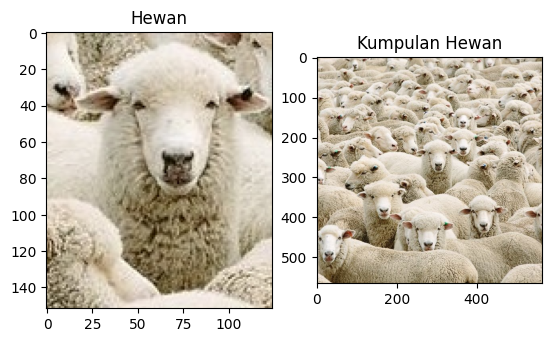

In [5]:
# tampilkan kedua gambar
from matplotlib import pyplot as plt
import cv2

# panggil dan konversi warna agar sesuai dengan Matplotlib
Hewan = cv2.imread('domba.jpg')
Hewan = cv2.cvtColor(Hewan, cv2.COLOR_BGR2RGB)

# panggil dan konversi warna agar sesuai dengan Matplotlib
Kumpulan_Hewan = cv2.imread('dombas.jpg')
Kumpulan_Hewan = cv2.cvtColor(Kumpulan_Hewan, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(Hewan), plt.title('Hewan')
plt.subplot(122),plt.imshow(Kumpulan_Hewan), plt.title('Kumpulan Hewan')
plt.show()

Jumlah objek ditemukan:  32


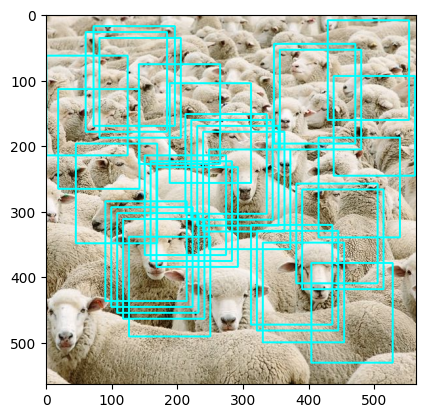

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Membaca gambar utuh untuk dicari
img_rgb = cv2.imread('dombas.jpg')
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)

## Membaca template
template = cv2.imread('domba.jpg', 0)

## Ukuran template. Ukuran ini akan digunakan untuk menggambar kotak
w, h = template.shape[::-1]

## Mengubah gambar utuh menjadi grayscale
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

## Menggunakan metode COEFF-NORMALIZED
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

## Nilai threshold atau ambang batas deteksi kemiripan titik.
## Lakukan eksperimen dengan merubah nilai ini
threshold = 0.15
loc = np.where(res >= threshold)

## Membuat array kosong untuk menyimpan lokasi-lokasi dari hasil deteksi
lspoint = []
lspoint2 = []
count = 0 # Untuk menyimpan jumlah matching yang ditemukan
for pt in zip(*loc[::-1]):
    ## Jika sudah ada, skip lokasi tersebut
    if pt[0] not in lspoint and pt[1] not in lspoint2:
        ## Gambar persegi warna kuning dengan ketebalan dua poin
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 2)
        for i in range(pt[0] - 9, pt[0] + 9):
            ## Tambahkan koordinat x ke list
            lspoint.append(i)
        for k in range(pt[1] - 9, pt[1] + 9):
            ## Tambahkan koordinat y ke list
            lspoint2.append(k)
        count += 1 # Berapa jumlah matching yang ditemukan?
    else:
        continue
print("Jumlah objek ditemukan: ", count)

## Tampilkan dengan imshow
plt.imshow(img_rgb)
plt.show()